## Menginstall Library yang dibutuhkan

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk

## Melakukan Import Library

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import Dataset

In [ ]:
data_1 = pd.read_csv("/content/sample_data/anies_100sample_test.csv")
data_2 = pd.read_csv("/content/sample_data/anies_100sample_train.csv")
data_3 = pd.read_csv("/content/sample_data/ganjar_100sample_test.csv")
data_4 = pd.read_csv("/content/sample_data/ganjar_100sample_train.csv")
data_5 = pd.read_csv("/content/sample_data/prabowo_100sample_train.csv")

# t_1 = data[data['airline_sentiment']=='positive']#.sample(100,replace=True)
# t_2 = data[data['airline_sentiment']=='negative']#.sample(400,replace=True)
# tweets = pd.concat([t_1, t_2])

In [ ]:
data_2.rename(columns={'sentence': 'Text','overall':'label'}, inplace=True)

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    100 non-null    object
 1   label   100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [ ]:
data_1 = data_1[["Text","label"]]
data_2 = data_2[["Text","label"]]
data_3 = data_3[["Text","label"]]
data_4 = data_4[["Text","label"]]
data_5 = data_5[["Text","label"]]

In [ ]:
data_test.head()

,Text,label
0,"mastoto, sorry, i'm from a village far from th...",Positive
1,fahri hamzah flicks ahy speak for himself demo...,Positive
2,"admitting that he is ready to debate, ali refu...",Positive
3,"o allah, make mr anies baswedan president",Negative
4,"come on, let's get together, bro",Negative


In [ ]:
data = pd.concat([data_1, data_2, data_3, data_4, data_5], ignore_index=True)
# data = pd.concat([data_1, data_2], ignore_index=True)
data

,Text,label
0,"mastoto, sorry, i'm from a village far from th...",Positive
1,fahri hamzah flicks ahy speak for himself demo...,Positive
2,"admitting that he is ready to debate, ali refu...",Positive
3,"o allah, make mr anies baswedan president",Negative
4,"come on, let's get together, bro",Negative
...,...,...
495,prabowo said about his rival jokowi,Negative
496,mr gangar accompanied mr president accompanied...,Negative
497,smrc called pak prabowo the most well-known pr...,Positive
498,it is known that the lsj survey institute rele...,Negative


In [ ]:
data.label.value_counts()

Positive    252
Negative    248
Name: label, dtype: int64

## Explorasi Data

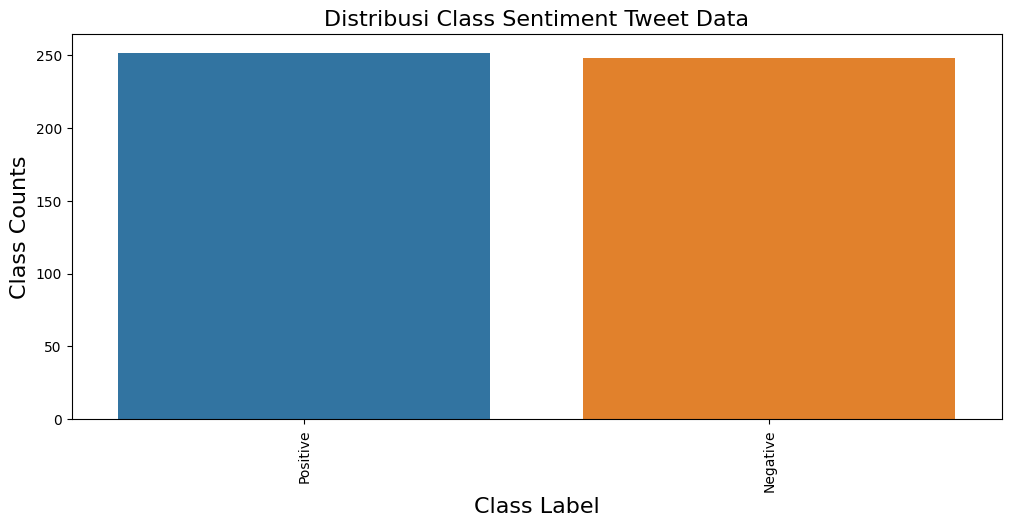

In [ ]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=data)
plt.title('Distribusi Class Sentiment Tweet Data', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

## Pemrosesan Data

In [ ]:
data_train

,sentence,overall
0,jokowi coalition heats up cabinet reshuffle is...,Negative
1,"id ganesha for poor people, the solution is t...",Negative
2,"hush, what if anies baswed becomes president ...",Negative
3,great anies for president,Positive
4,hopefully the people' s suffering will soon e...,Positive
...,...,...
95,sentenced to years and months of bribing unila...,Negative
96,anies for president bro,Positive
97,i hope that mr. anies baswedan is destined to ...,Positive
98,anies remains president of the republic of in...,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:, 0].values
le = LabelEncoder()
le.fit(["Positive", "Negative"])

print(list(le.classes_))
y = le.transform(data.iloc[:, 1].values)

#y = tweets.iloc[:, 1].values
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['Negative', 'Positive']
(500,)
mastoto, sorry, i'm from a village far from the city, but my village residents and i have agreed to support mr. anies baswedan to become president of the republic of indonesia.
(500,)
1


In [ ]:
# Membuat empty List
processed_tweets = []

for tweet in range(0, len(X)):
    # Hapus semua special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # Ubah menjadi Lowercase
    processed_tweet = processed_tweet.lower()

    # Masukkan ke list kosong yang telah dibuat sebelumnya
    processed_tweets.append(processed_tweet)

In [ ]:
# Cek sebelum cleaning data
print(str(X[:5]))
print()

# Cek setelah cleaning data
processed_tweets[:5]

["mastoto, sorry, i'm from a village far from the city, but my village residents and i have agreed to support mr. anies baswedan to become president of the republic of indonesia."
 'fahri hamzah flicks ahy speak for himself democratic politicians put their bodies together for debate ketum we are ready jokowi pharaoh village head age minions kevin kls lisa shines in riyadh'
 'admitting that he is ready to debate, ali refuses, mr. mahfud knows that the debate with me has already stumbled.'
 'o allah, make mr anies baswedan president'
 "come on, let's get together, bro"]



['mastoto  sorry  i m from a village far from the city  but my village residents and i have agreed to support mr  anies baswedan to become president of the republic of indonesia ',
 'fahri hamzah flicks ahy speak for himself democratic politicians put their bodies together for debate ketum we are ready jokowi pharaoh village head age minions kevin kls lisa shines in riyadh',
 'admitting that he is ready to debate  ali refuses  mr  mahfud knows that the debate with me has already stumbled ',
 'o allah  make mr anies baswedan president',
 'come on  let s get together  bro']

## Skema TF-IDF untuk Pembuatan Feature Numeric

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(processed_tweets).toarray()

## Membagi Data ke Training dan Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

## Pelatihan dan Evaluasi dari Model Klasifikasi Teks

In [ ]:
import time

from sklearn.ensemble import RandomForestClassifier

text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [ ]:
from sklearn.naive_bayes import GaussianNB
text_classifier_nb = GaussianNB()
t0_nb = time.time()
text_classifier_nb.fit(X_train, y_train)
t1_nb = time.time()

In [ ]:
from sklearn.svm import SVC
text_classifier_svm = SVC(kernel='linear')
t0_svm = time.time()
text_classifier_svm.fit(X_train, y_train)
t1_svm = time.time()

In [ ]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

predictions_nb = text_classifier_nb.predict(X_test)
t2_nb = time.time()
time_linear_train_nb = t1_nb-t0_nb
time_linear_predict_nb = t2_nb-t1_nb

predictions_svm = text_classifier_svm.predict(X_test)
t2_svm = time.time()
time_linear_train_svm = t1_svm-t0_svm
time_linear_predict_svm = t2_svm-t1_svm

# results
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))

EN Training time: 0.213556s; Prediction time: 6.504550s
NB Training time: 0.004172s; Prediction time: 5.710889s
SVM Training time: 0.020704s; Prediction time: 4.304333s


## Results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")
print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_nb)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_nb)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_nb)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_nb)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_nb))
print("")
print("Support Vector Machine")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_svm)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_svm)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_svm)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_svm)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_svm))
print("")

print("Random Forest")
print(confusion_matrix(y_test,predictions_en))
print("")
print("Naive Bayes")
print(confusion_matrix(y_test,predictions_nb))
print("")
print("Support Vector Machine")
print(confusion_matrix(y_test,predictions_svm))
print("")

print("Random Forest")
print(classification_report(y_test,predictions_en))
print("")
print("Naive Bayes")
print(classification_report(y_test,predictions_nb))
print("")
print("Support Vector Machine")
print(classification_report(y_test,predictions_svm))

Random Forest
Accuracy  =  74.67 %
Recall    =  73.61 %
Precision =  73.61 %
F1-Score  =  73.61 %
ROC AUC   =  0.7462606837606838

Naive Bayes
Accuracy  =  69.33 %
Recall    =  70.83 %
Precision =  67.11 %
F1-Score  =  68.92 %
ROC AUC   =  0.6939102564102565

Support Vector Machine
Accuracy  =  68.67 %
Recall    =  69.44 %
Precision =  66.67 %
F1-Score  =  68.03 %
ROC AUC   =  0.686965811965812

Random Forest
[[59 19]
 [19 53]]

Naive Bayes
[[53 25]
 [21 51]]

Support Vector Machine
[[53 25]
 [22 50]]

Random Forest
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        78
           1       0.74      0.74      0.74        72

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150


Naive Bayes
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        78
           1       0.67      

Confusion Matrix:
[[39 12]
 [16 33]]


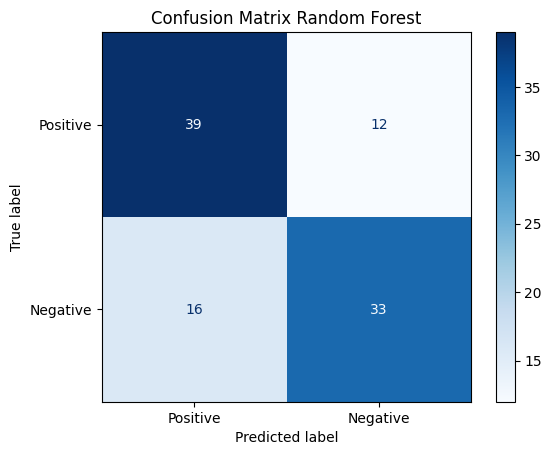

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the counts
a = 39  # True Positives
b = 12  # False Negatives
c = 16  # False Positives
d = 33  # True Negatives

# Create the confusion matrix
conf_matrix = np.array([[a, b], [c, d]])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# If you want a more visually appealing display
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Positive', 'Negative'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix Random Forest")
plt.show()

Confusion Matrix:
[[37 14]
 [16 33]]


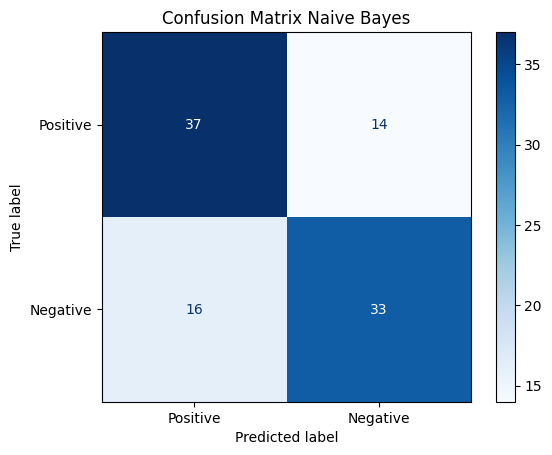

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the counts
a = 37  # True Positives
b = 14  # False Negatives
c = 16  # False Positives
d = 33  # True Negatives

# Create the confusion matrix
conf_matrix = np.array([[a, b], [c, d]])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# If you want a more visually appealing display
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Positive', 'Negative'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix Naive Bayes")
plt.show()

Confusion Matrix:
[[37 14]
 [14 35]]


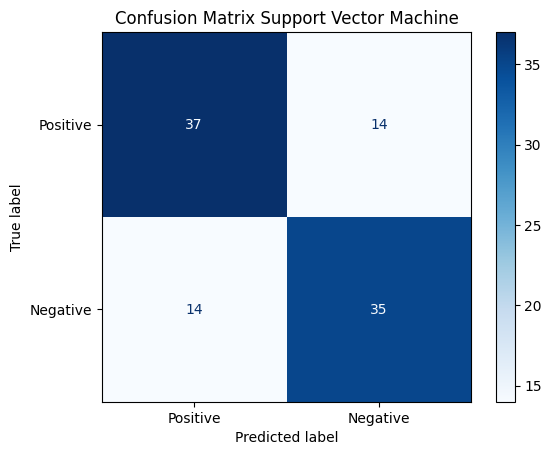

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the counts
a = 37  # True Positives
b = 14  # False Negatives
c = 14  # False Positives
d = 35  # True Negatives

# Create the confusion matrix
conf_matrix = np.array([[a, b], [c, d]])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# If you want a more visually appealing display
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Positive', 'Negative'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix Support Vector Machine")
plt.show()

Confusion Matrix:
[[36 15]
 [14 35]]
Recall (Sensitivity): 0.71
Precision: 0.70


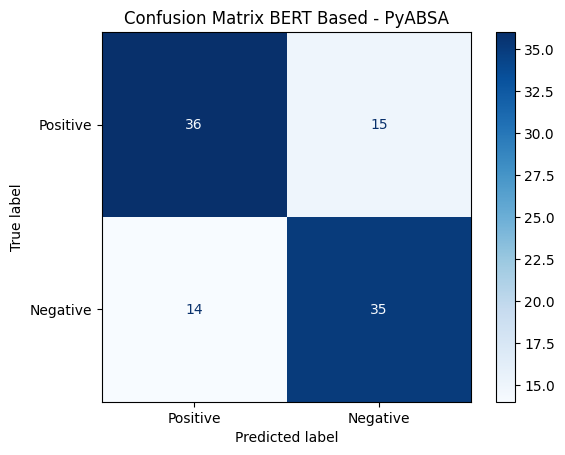

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


TN = 36
FP = 15
FN = 14
TP = 35

# Create the confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Print the results
print("Recall (Sensitivity): {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))

# If you want a more visually appealing display
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Positive', 'Negative'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix BERT Based - PyABSA")
plt.show()

## Testing Prediksi

In [ ]:
# Given values
f1_neg = 0.71
f1_pos = 0.69
n_neg = 51
n_pos = 49

# Calculate the overall F1 score
overall_f1 = (n_neg * f1_neg + n_pos * f1_pos) / (n_neg + n_pos)

print(f"Overall F1 Score: {overall_f1:.4f}")

Overall F1 Score: 0.7002


In [ ]:
# Given values
recall_neg = 0.65
recall_pos = 0.84
n_neg = 51 # Replace with the number of samples in the negative class
n_pos = 49# Replace with the number of samples in the positive class

# Calculate the overall recall
overall_recall = (n_neg * recall_neg + n_pos * recall_pos) / (n_neg + n_pos)

print(f"Overall Recall: {overall_recall:.4f}")

Overall Recall: 0.7431


In [ ]:
# Given values
precision_neg = 0.76
precision_pos = 0.67
n_neg =  51 # Replace with the number of samples in the negative class
n_pos =  49# Replace with the number of samples in the positive class

# Calculate the overall precision
overall_precision = (n_neg * precision_neg + n_pos * precision_pos) / (n_neg + n_pos)

print(f"Overall Precision: {overall_precision:.4f}")

Overall Precision: 0.7159


In [ ]:
# Input text
review = "I dont want to support Prabowo"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_nb.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Positive']
